<a href="https://colab.research.google.com/github/ftk1000/w2v_ftk1000/blob/master/w2v_tf_fast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
# w2v_tf_fast
import pandas as pd
pd.options.display.max_columns = 50
pd.set_option('display.width', 1000)


corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    return results

corpus = remove_stop_words(corpus)
sentences = [s.split(' ') for s in corpus]

# words = []
# for text in corpus:
#     for word in text.split(' '):
#         words.append(word)
# words = set(words)

words=[]
for ss in sentences:
  words += ss
words = set(words)
print(f'{len(words)} words in VOCAB=', words)

word2int = {}
for i,word in enumerate(words):
    word2int[word] = i
print('word2int=', word2int)

WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])
df = pd.DataFrame(data, columns = ['input', 'label'])
print('df.shape =', df.shape)
print(sentences)
df.head(n=10)

12 words in VOCAB= {'princess', 'pretty', 'strong', 'boy', 'man', 'king', 'young', 'wise', 'queen', 'prince', 'girl', 'woman'}
word2int= {'princess': 0, 'pretty': 1, 'strong': 2, 'boy': 3, 'man': 4, 'king': 5, 'young': 6, 'wise': 7, 'queen': 8, 'prince': 9, 'girl': 10, 'woman': 11}
df.shape = (52, 2)
[['king', 'strong', 'man'], ['queen', 'wise', 'woman'], ['boy', 'young', 'man'], ['girl', 'young', 'woman'], ['prince', 'young', 'king'], ['princess', 'young', 'queen'], ['man', 'strong'], ['woman', 'pretty'], ['prince', 'boy', 'king'], ['princess', 'girl', 'queen']]


,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [67]:
w2idx = pd.DataFrame.from_dict({ 'values': word2int.values(), 'word': word2int.keys() })
# print(w2idx.head())

import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import plot_model

ONE_HOT_DIM = len(words)
print('ONE_HOT_DIM = ', ONE_HOT_DIM)
# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word


# print(df.head())
print('word2int=', word2int)
# k=0
for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))
    # if k<5:
    #   Xtmp = to_one_hot_encoding(word2int[ x ])
    #   Ytmp = to_one_hot_encoding(word2int[ y ])
    #   print(x,'\t===>',Xtmp, '\t\t\t\t',  y ,'===>',Ytmp)
    #   k+=1


# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)
df['X_train']=list(X_train)
df['Y_train']=list(Y_train)
df.head()

ONE_HOT_DIM =  12
word2int= {'princess': 0, 'pretty': 1, 'strong': 2, 'boy': 3, 'man': 4, 'king': 5, 'young': 6, 'wise': 7, 'queen': 8, 'prince': 9, 'girl': 10, 'woman': 11}


,input,label,X_train,Y_train
0,king,strong,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,king,man,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
2,strong,king,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
3,strong,man,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
4,man,king,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."


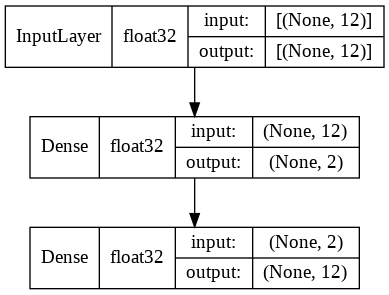

In [73]:
from keras import models
from keras import layers 
network = models.Sequential()
# https://www.tensorflow.org/api_docs/python/tf/keras/activations   # network.add( layers.Dense(2, activation='relu', input_shape=(12,) ) )
network.add( layers.Dense(2, activation='linear', input_shape=(12,) ) )
network.add( layers.Dense(12, activation='softmax' ) )
plot_model(network, show_shapes=1, show_dtype=1,show_layer_names=0)              # plot_model(network, show_shapes=1, show_layer_names=1)


In [79]:
network.compile( optimizer='rmsprop', 
                 loss = 'categorical_crossentropy', 
                 metrics = ['accuracy'] )
network.fit( X_train, Y_train, epochs=100, batch_size=1, verbose=0)
# ?network.fit
print('done')

done


In [82]:
network.weights

[<tf.Variable 'dense_8/kernel:0' shape=(12, 2) dtype=float32, numpy=
 array([[-0.97510445,  0.1373287 ],
        [ 1.3639522 ,  1.1242893 ],
        [-2.2308335 , -0.7693029 ],
        [-0.5495118 ,  0.82197315],
        [ 2.588745  ,  1.9182519 ],
        [-0.5636432 ,  1.5784578 ],
        [-0.13952069,  0.82493156],
        [-0.42625022,  1.1849515 ],
        [ 1.7762978 , -1.654417  ],
        [ 2.5008066 ,  2.7190084 ],
        [ 1.4317445 ,  0.3235264 ],
        [-0.42912212, -1.6877227 ]], dtype=float32)>,
 <tf.Variable 'dense_8/bias:0' shape=(2,) dtype=float32, numpy=array([ 0.07473114, -0.02692224], dtype=float32)>,
 <tf.Variable 'dense_9/kernel:0' shape=(2, 12) dtype=float32, numpy=
 array([[-0.7130837, -1.4806995, -0.8806491, -1.1665227, -2.0305922,
         -1.0767251, -1.0639976, -1.1305604, -1.6105447, -1.844313 ,
         -1.3766019, -1.0236791],
        [-2.4955916, -2.7239256, -1.7322878, -1.4234288, -2.1139448,
         -1.680605 , -2.1129918, -2.8864455, -2.0471253, 

In [83]:
network.get_weights()

[array([[-0.97510445,  0.1373287 ],
        [ 1.3639522 ,  1.1242893 ],
        [-2.2308335 , -0.7693029 ],
        [-0.5495118 ,  0.82197315],
        [ 2.588745  ,  1.9182519 ],
        [-0.5636432 ,  1.5784578 ],
        [-0.13952069,  0.82493156],
        [-0.42625022,  1.1849515 ],
        [ 1.7762978 , -1.654417  ],
        [ 2.5008066 ,  2.7190084 ],
        [ 1.4317445 ,  0.3235264 ],
        [-0.42912212, -1.6877227 ]], dtype=float32),
 array([ 0.07473114, -0.02692224], dtype=float32),
 array([[-0.7130837, -1.4806995, -0.8806491, -1.1665227, -2.0305922,
         -1.0767251, -1.0639976, -1.1305604, -1.6105447, -1.844313 ,
         -1.3766019, -1.0236791],
        [-2.4955916, -2.7239256, -1.7322878, -1.4234288, -2.1139448,
         -1.680605 , -2.1129918, -2.8864455, -2.0471253, -1.4459993,
         -2.4566011, -2.0511937]], dtype=float32),
 array([-3.2867498, -5.0678787, -3.9071274, -3.654713 , -2.8057609,
        -2.935007 , -2.2635174, -4.059876 , -2.541485 , -3.355741 ,
   

In [95]:
# # https://ai-pool.com/d/how-to-get-the-weights-of-keras-model-
# for layer in model.layers:
#     weights = layer.get_weights() # list

# from keras.models import Sequential
# model = Sequential()
# weights = model.get_weights() # returs a numpy list of weights  

print('WEIGHT MATRICES:')
for layer in network.layers:
    weights = layer.get_weights() # list
    print(weights[0].shape)
    print(weights[0])

print('\n\nBIASES:')
for layer in network.layers:
    bias = layer.bias # list
    print(bias.shape)
    print(bias)    

WEIGHT MATRICES:
(12, 2)
[[-0.97510445  0.1373287 ]
 [ 1.3639522   1.1242893 ]
 [-2.2308335  -0.7693029 ]
 [-0.5495118   0.82197315]
 [ 2.588745    1.9182519 ]
 [-0.5636432   1.5784578 ]
 [-0.13952069  0.82493156]
 [-0.42625022  1.1849515 ]
 [ 1.7762978  -1.654417  ]
 [ 2.5008066   2.7190084 ]
 [ 1.4317445   0.3235264 ]
 [-0.42912212 -1.6877227 ]]
(2, 12)
[[-0.7130837 -1.4806995 -0.8806491 -1.1665227 -2.0305922 -1.0767251
  -1.0639976 -1.1305604 -1.6105447 -1.844313  -1.3766019 -1.0236791]
 [-2.4955916 -2.7239256 -1.7322878 -1.4234288 -2.1139448 -1.680605
  -2.1129918 -2.8864455 -2.0471253 -1.4459993 -2.4566011 -2.0511937]]


BIASES:
(2,)
<tf.Variable 'dense_8/bias:0' shape=(2,) dtype=float32, numpy=array([ 0.07473114, -0.02692224], dtype=float32)>
(12,)
<tf.Variable 'dense_9/bias:0' shape=(12,) dtype=float32, numpy=
array([-3.2867498, -5.0678787, -3.9071274, -3.654713 , -2.8057609,
       -2.935007 , -2.2635174, -4.059876 , -2.541485 , -3.355741 ,
       -2.9069571, -2.9273875], dtype

In [97]:
  bias.shape

TensorShape([12])

In [102]:
bias.value

<bound method BaseResourceVariable.value of <tf.Variable 'dense_9/bias:0' shape=(12,) dtype=float32, numpy=
array([-3.2867498, -5.0678787, -3.9071274, -3.654713 , -2.8057609,
       -2.935007 , -2.2635174, -4.059876 , -2.541485 , -3.355741 ,
       -2.9069571, -2.9273875], dtype=float32)>>

In [103]:
layer.get_weights

<bound method Layer.get_weights of <tensorflow.python.keras.layers.core.Dense object at 0x7f3f61e7aa10>>

In [104]:
d2 = pd.DataFrame(  network.weights[0].numpy(),  columns = ['x1', 'x2'] )
w2v_df = pd.concat( [w2idx,d2],axis=1 )
w2v_df

,values,word,x1,x2
0,0,princess,-0.975104,0.137329
1,1,pretty,1.363952,1.124289
2,2,strong,-2.230834,-0.769303
3,3,boy,-0.549512,0.821973
4,4,man,2.588745,1.918252
5,5,king,-0.563643,1.578458
6,6,young,-0.139521,0.824932
7,7,wise,-0.426250,1.184952
8,8,queen,1.776298,-1.654417
9,9,prince,2.500807,2.719008


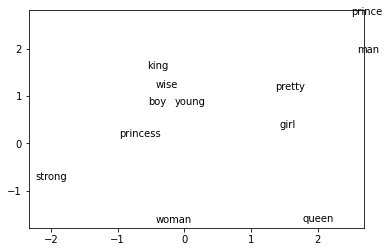

In [105]:

%matplotlib inline
import matplotlib.pyplot as plt

x1 = np.array(w2v_df['x1'])
x2 = np.array(w2v_df['x2'])
plt.close()
PADDING = .1
x_axis_min, x_axis_max = np.min(x1)-PADDING, np.max(x1)+PADDING
y_axis_min, y_axis_max = np.min(x2)-PADDING, np.max(x2)+PADDING


fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (15,10)
# plt.figure(figsize=(10,10))

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)

# plt.scatter(x1, x2, c='red', alpha=0.5)
plt.show()


In [48]:
# [(x, y) for x in [1,2,3] for y in [3,1,4] if x != y]
sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
sentences


[['king', 'strong', 'man'],
 ['queen', 'wise', 'woman'],
 ['boy', 'young', 'man'],
 ['girl', 'young', 'woman'],
 ['prince', 'young', 'king'],
 ['princess', 'young', 'queen'],
 ['man', 'strong'],
 ['woman', 'pretty'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

In [50]:

sentences

[['king', 'strong', 'man'],
 ['queen', 'wise', 'woman'],
 ['boy', 'young', 'man'],
 ['girl', 'young', 'woman'],
 ['prince', 'young', 'king'],
 ['princess', 'young', 'queen'],
 ['man', 'strong'],
 ['woman', 'pretty'],
 ['prince', 'boy', 'king'],
 ['princess', 'girl', 'queen']]

In [90]:
layer.bias

<tf.Variable 'dense_9/bias:0' shape=(12,) dtype=float32, numpy=
array([-3.2867498, -5.0678787, -3.9071274, -3.654713 , -2.8057609,
       -2.935007 , -2.2635174, -4.059876 , -2.541485 , -3.355741 ,
       -2.9069571, -2.9273875], dtype=float32)>

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

In [25]:
ww

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

In [29]:
ww=set();
[ww.union((set(ss))) for ss in [s.split(' ') for s in corpus]]

[{'king', 'man', 'strong'},
 {'queen', 'wise', 'woman'},
 {'boy', 'man', 'young'},
 {'girl', 'woman', 'young'},
 {'king', 'prince', 'young'},
 {'princess', 'queen', 'young'},
 {'man', 'strong'},
 {'pretty', 'woman'},
 {'boy', 'king', 'prince'},
 {'girl', 'princess', 'queen'}]